In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the data
miceData = pd.read_excel('Mice.xls')
headers = list(miceData)

In [3]:
# Check if the data is loaded properly
miceData.shape

(1080, 82)

In [4]:
# Remove white spaces
miceData.iloc[:,0] = miceData.iloc[:,0].str.strip()
for i in range(78,82):
    miceData.iloc[:,i] = miceData.iloc[:,i].str.strip()

In [5]:
# Checking typos in the non-numerical data columns
for i in range(78,82):
    print(miceData.iloc[:,i].value_counts())

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64
Memantine    570
Saline       510
Name: Treatment, dtype: int64
S/C    555
C/S    525
Name: Behavior, dtype: int64
c-CS-m    150
c-SC-m    150
t-CS-m    135
c-SC-s    135
t-SC-s    135
c-CS-s    135
t-SC-m    135
t-CS-s    105
Name: class, dtype: int64


In [6]:
# Sanity Checks
for i in range(0,82):
    print(miceData.iloc[:,i].value_counts())

363_5      1
3411_10    1
3422_1     1
3530_13    1
3500_12    1
          ..
3429_11    1
3484_2     1
3481_3     1
J1291_9    1
3498_3     1
Name: MouseID, Length: 1080, dtype: int64
0.399414    1
0.412268    1
0.487528    1
0.171823    1
0.247678    1
           ..
0.284737    1
0.317157    1
0.332271    1
0.838116    1
0.343750    1
Name: DYRK1A_N, Length: 1077, dtype: int64
0.639280    2
0.529062    1
0.499294    1
0.554380    1
0.821877    1
           ..
0.477591    1
0.786627    1
0.338680    1
0.549559    1
0.460938    1
Name: ITSN1_N, Length: 1076, dtype: int64
0.265628    1
0.319143    1
0.308158    1
0.331378    1
0.315109    1
           ..
0.279554    1
0.263723    1
0.382093    1
0.432996    1
0.309610    1
Name: BDNF_N, Length: 1077, dtype: int64
2.164182    1
2.953580    1
2.144255    1
1.540847    1
2.742215    1
           ..
2.919243    1
2.148795    1
1.936624    1
2.309554    1
1.875000    1
Name: NR1_N, Length: 1077, dtype: int64
2.749733    1
2.613441    1
2.458

In [7]:
# Handling missing values
for i in range(1,78):
    miceData.loc[miceData['class'] == 'c-CS-m', headers[i]] = miceData.loc[miceData['class'] == 'c-CS-m', headers[i]].fillna(miceData.loc[miceData['class'] == 'c-CS-m', headers[i]].mean())
    miceData.loc[miceData['class'] == 'c-CS-s', headers[i]] = miceData.loc[miceData['class'] == 'c-CS-s', headers[i]].fillna(miceData.loc[miceData['class'] == 'c-CS-s', headers[i]].mean())
    miceData.loc[miceData['class'] == 'c-SC-m', headers[i]] = miceData.loc[miceData['class'] == 'c-SC-m', headers[i]].fillna(miceData.loc[miceData['class'] == 'c-SC-m', headers[i]].mean())
    miceData.loc[miceData['class'] == 'c-SC-s', headers[i]] = miceData.loc[miceData['class'] == 'c-SC-s', headers[i]].fillna(miceData.loc[miceData['class'] == 'c-SC-s', headers[i]].mean())
    miceData.loc[miceData['class'] == 't-CS-m', headers[i]] = miceData.loc[miceData['class'] == 't-CS-m', headers[i]].fillna(miceData.loc[miceData['class'] == 't-CS-m', headers[i]].mean())
    miceData.loc[miceData['class'] == 't-CS-s', headers[i]] = miceData.loc[miceData['class'] == 't-CS-s', headers[i]].fillna(miceData.loc[miceData['class'] == 't-CS-s', headers[i]].mean())
    miceData.loc[miceData['class'] == 't-SC-m', headers[i]] = miceData.loc[miceData['class'] == 't-SC-m', headers[i]].fillna(miceData.loc[miceData['class'] == 't-SC-m', headers[i]].mean())
    miceData.loc[miceData['class'] == 't-SC-s', headers[i]] = miceData.loc[miceData['class'] == 't-SC-s', headers[i]].fillna(miceData.loc[miceData['class'] == 't-SC-s', headers[i]].mean())

In [8]:
# Converting all the non-numerical columns to upper case
for i in range(78,82):
    miceData.iloc[:,i] = miceData.iloc[:,i].str.upper()

In [9]:
# Converting all the non-numerical columns to categorical columns
miceData.iloc[:,78] = pd.Categorical(miceData.iloc[:,78], ['CONTROL', 'TS65DN'])
miceData.iloc[:,79] = pd.Categorical(miceData.iloc[:,79], ['MEMANTINE', 'SALINE'])
miceData.iloc[:,80] = pd.Categorical(miceData.iloc[:,80], ['S/C', 'C/S'])
miceData.iloc[:,81] = pd.Categorical(miceData.iloc[:,81], ['C-SC-M', 'C-CS-M', 'T-SC-M', 'C-CS-S', 'T-SC-S', 'C-SC-S', 'T-CS-M', 'T-CS-S'])

In [10]:
# Visualizing 10 columns along with their desiciptice statistics

Sum = 586.5816707544998
Mean = 0.5431311766245368
Median = 0.4460267275
Standard deviation = 0.28020599683112835
Min = 0.217120181
Max = 1.872898533


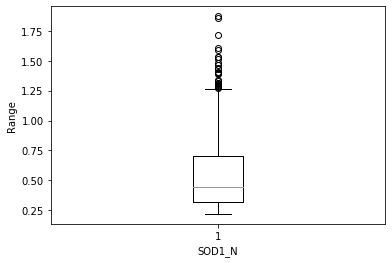

In [11]:
plt.boxplot(miceData['SOD1_N'])
plt.ylabel('Range')
plt.xlabel('SOD1_N')
print("Sum = " + str(sum(miceData['SOD1_N'])))
print("Mean = " + str(np.mean(miceData['SOD1_N'])))
print("Median = " + str(np.median(miceData['SOD1_N'])))
print("Standard deviation = " + str(np.std(miceData['SOD1_N'])))
print("Min = " + str(np.min(miceData['SOD1_N'])))
print("Max = " + str(np.max(miceData['SOD1_N'])))

Sum = 1444.8064496980005
Mean = 1.3377837497203708
Median = 1.317440838
Standard deviation = 0.3169793718599023
Min = 0.586478779
Max = 2.129791061


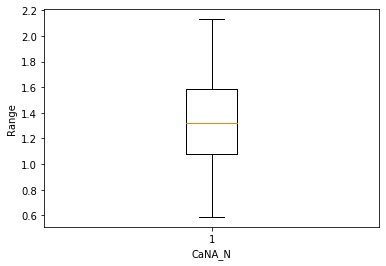

In [12]:
plt.boxplot(miceData['CaNA_N'])
plt.ylabel('Range')
plt.xlabel('CaNA_N')
print("Sum = " + str(sum(miceData['CaNA_N'])))
print("Mean = " + str(np.mean(miceData['CaNA_N'])))
print("Median = " + str(np.median(miceData['CaNA_N'])))
print("Standard deviation = " + str(np.std(miceData['CaNA_N'])))
print("Min = " + str(np.min(miceData['CaNA_N'])))
print("Max = " + str(np.max(miceData['CaNA_N'])))

Sum = 195.804110271
Mean = 0.18130010210277778
Median = 0.1826720455
Standard deviation = 0.02490741446413085
Min = 0.099734364
Max = 0.260738634


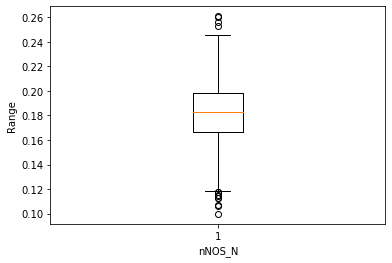

In [13]:
plt.boxplot(miceData['nNOS_N'])
plt.ylabel('Range')
plt.xlabel('nNOS_N')
print("Sum = " + str(sum(miceData['nNOS_N'])))
print("Mean = " + str(np.mean(miceData['nNOS_N'])))
print("Median = " + str(np.median(miceData['nNOS_N'])))
print("Standard deviation = " + str(np.std(miceData['nNOS_N'])))
print("Min = " + str(np.min(miceData['nNOS_N'])))
print("Max = " + str(np.max(miceData['nNOS_N'])))

Sum = 2320.17902902423
Mean = 2.1483139157631763
Median = 2.1271399105
Standard deviation = 0.43210577229445163
Min = 1.134886146
Max = 3.680551799


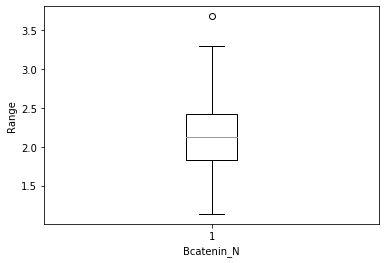

In [14]:
plt.boxplot(miceData['Bcatenin_N'])
plt.ylabel('Range')
plt.xlabel('Bcatenin_N')
print("Sum = " + str(sum(miceData['Bcatenin_N'])))
print("Mean = " + str(np.mean(miceData['Bcatenin_N'])))
print("Median = " + str(np.median(miceData['Bcatenin_N'])))
print("Standard deviation = " + str(np.std(miceData['Bcatenin_N'])))
print("Min = " + str(np.min(miceData['Bcatenin_N'])))
print("Max = " + str(np.max(miceData['Bcatenin_N'])))

Sum = 195.566508338
Mean = 0.18108010031296295
Median = 0.1782350315
Standard deviation = 0.02928280939043787
Min = 0.117998506
Max = 0.316575348


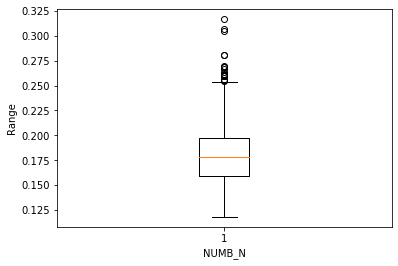

In [15]:
plt.boxplot(miceData['NUMB_N'])
plt.ylabel('Range')
plt.xlabel('NUMB_N')
print("Sum = " + str(sum(miceData['NUMB_N'])))
print("Mean = " + str(np.mean(miceData['NUMB_N'])))
print("Median = " + str(np.median(miceData['NUMB_N'])))
print("Standard deviation = " + str(np.std(miceData['NUMB_N'])))
print("Min = " + str(np.min(miceData['NUMB_N'])))
print("Max = " + str(np.max(miceData['NUMB_N'])))

Sum = 260.9795603501143
Mean = 0.24164774106492065
Median = 0.24481851999999998
Standard deviation = 0.033838137808961596
Min = 0.04629779
Max = 0.387190684


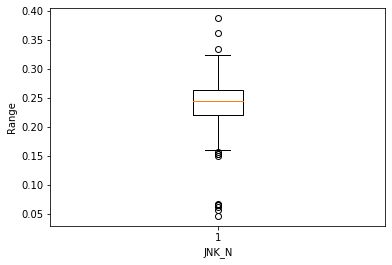

In [16]:
plt.boxplot(miceData['JNK_N'])
plt.ylabel('Range')
plt.xlabel('JNK_N')
print("Sum = " + str(sum(miceData['JNK_N'])))
print("Mean = " + str(np.mean(miceData['JNK_N'])))
print("Median = " + str(np.median(miceData['JNK_N'])))
print("Standard deviation = " + str(np.std(miceData['JNK_N'])))
print("Min = " + str(np.min(miceData['JNK_N'])))
print("Max = " + str(np.max(miceData['JNK_N'])))

Sum = 198.24182231395855
Mean = 0.18355724288329495
Median = 0.1749351515
Standard deviation = 0.037436578868279315
Min = 0.105537204
Max = 0.360692103


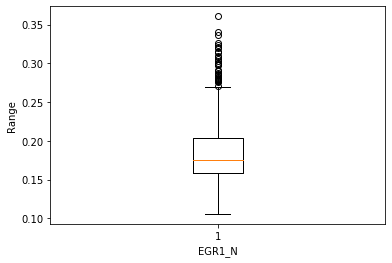

In [17]:
plt.boxplot(miceData['EGR1_N'])
plt.ylabel('Range')
plt.xlabel('EGR1_N')
print("Sum = " + str(sum(miceData['EGR1_N'])))
print("Mean = " + str(np.mean(miceData['EGR1_N'])))
print("Median = " + str(np.median(miceData['EGR1_N'])))
print("Standard deviation = " + str(np.std(miceData['EGR1_N'])))
print("Min = " + str(np.min(miceData['EGR1_N'])))
print("Max = " + str(np.max(miceData['EGR1_N'])))

Sum = 239.59903571899991
Mean = 0.221850958999074
Median = 0.21690203
Standard deviation = 0.03486962380219961
Min = 0.111382114
Max = 0.331015923


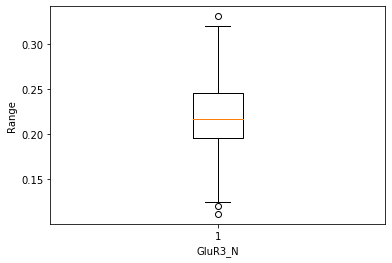

In [18]:
plt.boxplot(miceData['GluR3_N'])
plt.ylabel('Range')
plt.xlabel('GluR3_N')
print("Sum = " + str(sum(miceData['GluR3_N'])))
print("Mean = " + str(np.mean(miceData['GluR3_N'])))
print("Median = " + str(np.median(miceData['GluR3_N'])))
print("Standard deviation = " + str(np.std(miceData['GluR3_N'])))
print("Min = " + str(np.min(miceData['GluR3_N'])))
print("Max = " + str(np.max(miceData['GluR3_N'])))

Sum = 136.68493276999993
Mean = 0.12656012293518512
Median = 0.123549039
Standard deviation = 0.02687251447986297
Min = 0.072579682
Max = 0.537004104


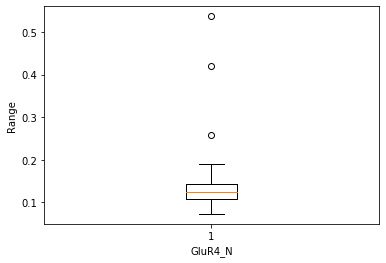

In [19]:
plt.boxplot(miceData['GluR4_N'])
plt.ylabel('Range')
plt.xlabel('GluR4_N')
print("Sum = " + str(sum(miceData['GluR4_N'])))
print("Mean = " + str(np.mean(miceData['GluR4_N'])))
print("Median = " + str(np.median(miceData['GluR4_N'])))
print("Standard deviation = " + str(np.std(miceData['GluR4_N'])))
print("Min = " + str(np.min(miceData['GluR4_N'])))
print("Max = " + str(np.max(miceData['GluR4_N'])))

Sum = 314.5783903059999
Mean = 0.2912762873203703
Median = 0.2906460025
Standard deviation = 0.030001227971550325
Min = 0.207437817
Max = 0.443735036


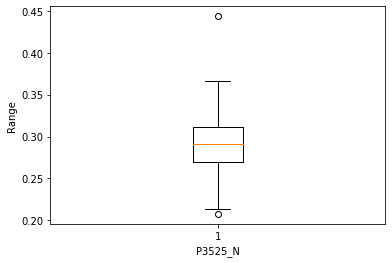

In [20]:
plt.boxplot(miceData['P3525_N'])
plt.ylabel('Range')
plt.xlabel('P3525_N')
print("Sum = " + str(sum(miceData['P3525_N'])))
print("Mean = " + str(np.mean(miceData['P3525_N'])))
print("Median = " + str(np.median(miceData['P3525_N'])))
print("Standard deviation = " + str(np.std(miceData['P3525_N'])))
print("Min = " + str(np.min(miceData['P3525_N'])))
print("Max = " + str(np.max(miceData['P3525_N'])))

In [21]:
# Visualizing 10 pairs of columns

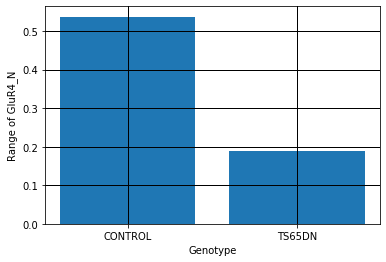

In [22]:
plt.bar(miceData.iloc[:,78], miceData.iloc[:,60])
plt.grid(color='k', linestyle='-', linewidth=1.0)
plt.xlabel('Genotype')
plt.ylabel('Range of ' + miceData.columns[60])
plt.rcParams["figure.figsize"] = (5,5)

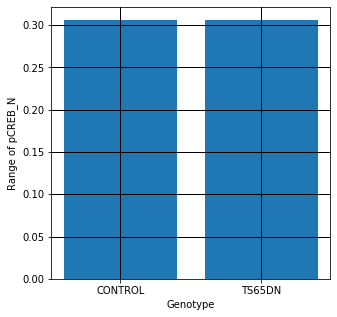

In [23]:
import matplotlib.pyplot as plt
plt.bar(miceData.iloc[:,78], miceData.iloc[:,9])
plt.grid(color='k', linestyle='-', linewidth=1.0)
plt.xlabel('Genotype')
plt.ylabel('Range of ' + miceData.columns[9])
plt.rcParams["figure.figsize"] = (5,5)

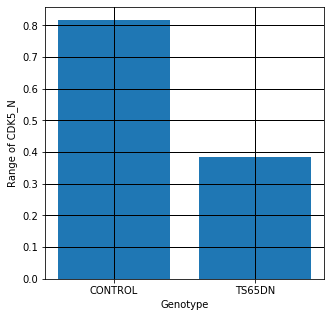

In [24]:
import matplotlib.pyplot as plt
plt.bar(miceData.iloc[:,78], miceData.iloc[:,48])
plt.grid(color='k', linestyle='-', linewidth=1.0)
plt.xlabel('Genotype')
plt.ylabel('Range of ' + miceData.columns[48])
plt.rcParams["figure.figsize"] = (5,5)

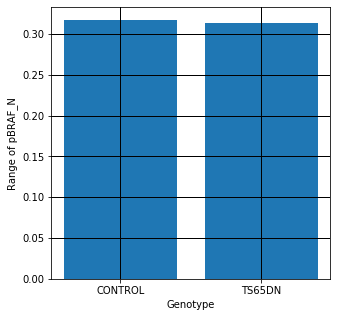

In [25]:
import matplotlib.pyplot as plt
plt.bar(miceData.iloc[:,78], miceData.iloc[:,7])
plt.grid(color='k', linestyle='-', linewidth=1.0)
plt.xlabel('Genotype')
plt.ylabel('Range of ' + miceData.columns[7])
plt.rcParams["figure.figsize"] = (5,5)

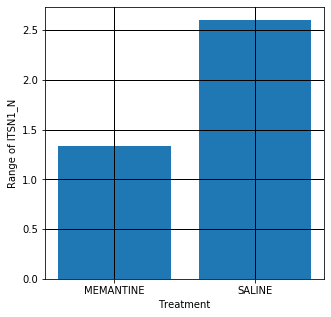

In [26]:
import matplotlib.pyplot as plt
plt.bar(miceData.iloc[:,79], miceData.iloc[:,2])
plt.grid(color='k', linestyle='-', linewidth=1.0)
plt.xlabel('Treatment')
plt.ylabel('Range of ' + miceData.columns[2])
plt.rcParams["figure.figsize"] = (5,5)

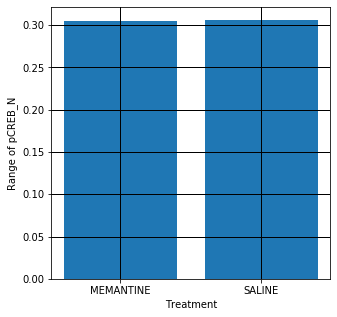

In [27]:
import matplotlib.pyplot as plt
plt.bar(miceData.iloc[:,79], miceData.iloc[:,9])
plt.grid(color='k', linestyle='-', linewidth=1.0)
plt.xlabel('Treatment')
plt.ylabel('Range of ' + miceData.columns[9])
plt.rcParams["figure.figsize"] = (5,5)

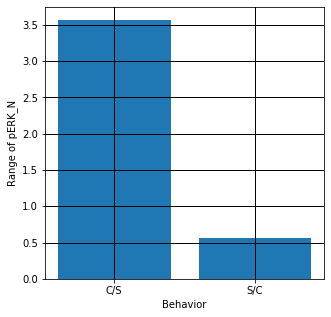

In [28]:
import matplotlib.pyplot as plt
plt.bar(miceData.iloc[:,80], miceData.iloc[:,11])
plt.grid(color='k', linestyle='-', linewidth=1.0)
plt.xlabel('Behavior')
plt.ylabel('Range of ' + miceData.columns[11])
plt.rcParams["figure.figsize"] = (5,5)

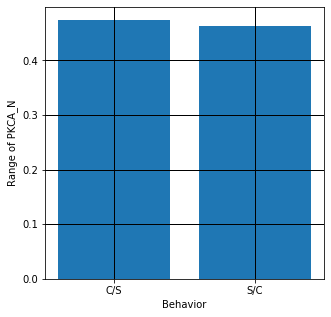

In [29]:
import matplotlib.pyplot as plt
plt.bar(miceData.iloc[:,80], miceData.iloc[:,13])
plt.grid(color='k', linestyle='-', linewidth=1.0)
plt.xlabel('Behavior')
plt.ylabel('Range of ' + miceData.columns[13])
plt.rcParams["figure.figsize"] = (5,5)

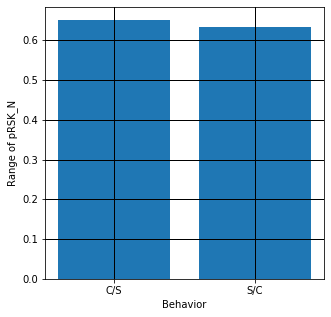

In [30]:
import matplotlib.pyplot as plt
plt.bar(miceData.iloc[:,80], miceData.iloc[:,19])
plt.grid(color='k', linestyle='-', linewidth=1.0)
plt.xlabel('Behavior')
plt.ylabel('Range of ' + miceData.columns[19])
plt.rcParams["figure.figsize"] = (5,5)

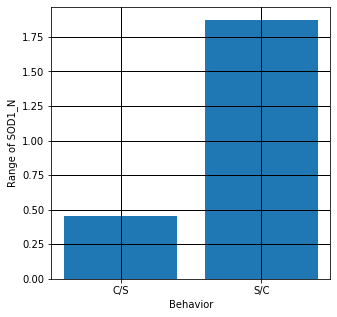

In [31]:
import matplotlib.pyplot as plt
plt.bar(miceData.iloc[:,80], miceData.iloc[:,33])
plt.grid(color='k', linestyle='-', linewidth=1.0)
plt.xlabel('Behavior')
plt.ylabel('Range of ' + miceData.columns[33])
plt.rcParams["figure.figsize"] = (5,5)

In [32]:
# Dividing the datset into independent and dependent varaibles
data = miceData.iloc[:,1:78]
target = miceData.iloc[:,81]

In [33]:
# Viewing the data before normalization
data.head(5)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.132539,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.132539,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.132539,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.132539,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.132539,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


In [34]:
# Normalizing the data
scaler = MinMaxScaler()
scaler.fit(data)
data = data.apply(lambda x : (x - x.min(axis = 0))/(x.max(axis = 0) - x.min(axis = 0)))

In [35]:
# Viewing the data after normalization
data.head(5)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,...,0.162941,0.177312,0.286884,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,...,0.220010,0.146494,0.286884,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,...,0.186816,0.155920,0.286884,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,...,0.179047,0.229602,0.286884,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,...,0.245702,0.215008,0.286884,0.410187,0.147711,0.350381,0.096959,0.136298,0.149281,0.812053


In [36]:
# Creating a k-fold reference
kf = KFold(n_splits=5, shuffle=True)

In [37]:
# Creating a method to print the evaluation score and returing the models accuracy
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    return model.score(X_test, y_test)

In [38]:
# Doing paarmeter tuning for KNN
scores_KNN = []

In [39]:
modelKNN = KNeighborsClassifier(n_neighbors=2, weights = 'uniform', p = 2, metric = 'minkowski')

In [40]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_KNN.append(get_score(modelKNN, X_train, X_test, y_train, y_test))

[[26  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0]
 [ 0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 32]]
[[42  0  0  0  0  0  0  0]
 [ 1 25  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0]
 [ 0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 25]]
[[23  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0]
 [ 0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0 18  0  0]
 [ 0  0  1  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 30]]
[[35  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0]
 [ 0  0  2 26  0  0  0  0]
 [ 0  0  0  0 24  0  0  0]
 [ 0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0 27]]
[[24  0  0  0  0  0  0  0]
 [ 2 28  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 1  0  0  0 21  0  0  

In [41]:
np.mean(scores_KNN)

0.9935185185185184

In [42]:
scores_KNN = []

In [43]:
modelKNN = KNeighborsClassifier(n_neighbors=2, weights = 'uniform', p = 3, metric = 'minkowski')

In [44]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_KNN.append(get_score(modelKNN, X_train, X_test, y_train, y_test))

[[24  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0]
 [ 0  0  0  0 27  0  0  0]
 [ 0  0  0  0  1 27  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 20]]
[[28  0  0  0  0  0  0  0]
 [ 1 35  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0]
 [ 0  0  1 27  0  0  0  0]
 [ 0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0 22  0]
 [ 0  0  1  0  0  0  0 25]]
[[36  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0]
 [ 0  0  1 18  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 29]]
[[29  0  0  0  1  0  0  0]
 [ 2 24  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0]
 [ 0  0  0  0 27  0  0  0]
 [ 0  2  0  0  0 14  0  0]
 [ 0  0  1  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 34]]
[[32  0  0  0  0  0  0  0]
 [ 2 18  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0]
 [ 0  0  1 31  0  0  0  0]
 [ 1  0  0  0 24  0  0  

In [45]:
np.mean(scores_KNN)

0.986111111111111

In [46]:
scores_KNN = []

In [47]:
modelKNN = KNeighborsClassifier(n_neighbors=2, weights = 'distance', p = 3, metric = 'minkowski')

In [48]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_KNN.append(get_score(modelKNN, X_train, X_test, y_train, y_test))

[[26  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 30]]
[[23  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  1]
 [ 1  0  0  0 25  0  0  0]
 [ 0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 27]]
[[34  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0 29]]
[[30  0  0  0  0  0  0  0]
 [ 3 37  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 26]]
[[37  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  2  0  0]
 [ 0  0 33  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0]
 [ 0  0  0  0 29  0  0  

In [49]:
np.mean(scores_KNN)

0.9935185185185185

In [50]:
scores_KNN = []

In [51]:
modelKNN = KNeighborsClassifier(n_neighbors=3, weights = 'distance', p = 3, metric = 'minkowski')

In [52]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_KNN.append(get_score(modelKNN, X_train, X_test, y_train, y_test))

[[21  0  0  0  0  0  0  0]
 [ 2 22  0  0  0  2  0  0]
 [ 0  0 30  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0]
 [ 1  0  0  0 24  0  0  0]
 [ 0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 34]]
[[34  0  0  0  0  0  0  0]
 [ 1 32  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]
 [ 0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 33]]
[[34  0  0  0  0  1  0  0]
 [ 0 24  0  0  0  0  0  0]
 [ 0  0 30  1  0  0  0  0]
 [ 0  0  0 23  0  0  0  0]
 [ 0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 23]]
[[30  0  0  0  0  0  0  0]
 [ 2 19  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0]
 [ 0  0  1 37  0  0  0  0]
 [ 0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 21]]
[[29  0  0  0  1  0  0  0]
 [ 0 31  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  1]
 [ 0  0  0  0 27  0  0  

In [53]:
np.mean(scores_KNN)

0.9879629629629629

In [54]:
scores_KNN = []

In [55]:
modelKNN = KNeighborsClassifier(n_neighbors=4, weights = 'uniform', p = 2, metric = 'minkowski')

In [56]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_KNN.append(get_score(modelKNN, X_train, X_test, y_train, y_test))

[[26  0  0  0  0  0  0  0]
 [ 2 28  0  0  0  2  0  0]
 [ 0  0 33  0  0  0  0  0]
 [ 0  0  1 27  0  0  0  0]
 [ 2  0  0  0 22  0  0  1]
 [ 0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 26]]
[[34  0  0  0  0  0  0  0]
 [ 2 20  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0]
 [ 0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 21]]
[[29  0  0  0  0  0  0  0]
 [ 1 27  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0]
 [ 1  0  0  0 35  0  0  0]
 [ 2  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0 22]]
[[30  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0]
 [ 0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]]
[[31  0  0  0  0  0  0  0]
 [ 1 26  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0]
 [ 0  0  0  0 27  0  0  

In [57]:
np.mean(scores_KNN)

0.986111111111111

In [58]:
scores_KNN = []

In [59]:
modelKNN = KNeighborsClassifier(n_neighbors=2, weights = 'distance', p = 2, metric = 'minkowski')

In [60]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_KNN.append(get_score(modelKNN, X_train, X_test, y_train, y_test))

[[33  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0]
 [ 0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 21]]
[[34  0  0  0  1  0  0  0]
 [ 1 27  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 22]]
[[25  0  0  0  0  0  0  0]
 [ 1 26  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 38]]
[[26  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 29]]
[[31  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  2  0  0]
 [ 0  0 24  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0]
 [ 0  0  0  0 23  0  0  

In [61]:
np.mean(scores_KNN)

0.9953703703703705

In [62]:
# Doing paarmeter tuning for DT
scores_DT = []

In [63]:
modelDT = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_features = 2, max_leaf_nodes = None, 
                                 min_samples_leaf = 1, min_samples_split = 2)

In [64]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_DT.append(get_score(modelDT, X_train, X_test, y_train, y_test))

[[14  2  2  0  1  0  0  3]
 [ 7 10  3  1  2  1  0  5]
 [ 3  0 12  3  1  0  8  1]
 [ 5  0  7  7  0  0  6  0]
 [ 6  3  0  4 16  0  0  0]
 [ 5  8  0  0  5  3  0  6]
 [ 2  0  7  0  1  0 17  0]
 [ 3  1  0  3  0  0  8 14]]
[[ 8  2  0  2 11  2  0  7]
 [ 1  3  0  1 14  0  1 11]
 [ 0  2 24  3  0  0  2  1]
 [ 1  0  4 11  0  1  4  5]
 [ 0  0  0  0 21  1  0  5]
 [ 6  0  0  0 11  2  0  2]
 [ 0  1  0  3  0  2 15  4]
 [ 0  0  0  1  0  2  1 18]]
[[14  8  5  0  4  0  1  1]
 [ 2 13  2  0  6  0  0  0]
 [ 2  2 16  0  1  0  3  5]
 [ 5  0 14  0  0  0 13  4]
 [ 1  2  1  0 19  3  0  0]
 [ 3  7  0  0  6  7  0  0]
 [ 0  1  5  0  0  0 14  1]
 [ 1  4  2  0  1  0  7 10]]
[[23  3  3  0  0  0  2  3]
 [ 1 13  4  0  0  1  1  5]
 [ 1  1 14  1  0  0 10  2]
 [ 2  0  0 16  0  0  4  0]
 [ 8  4  2  0  7  5  2  0]
 [ 5  1  0  0  5  3  0  4]
 [ 2  0 16  0  0  0  9  4]
 [ 5  1  0  0  0  0  2 21]]
[[14  5  4  0  2  2  2  0]
 [ 4 16  1  3  1  2  0  0]
 [ 0  0 21 10  0  0  1  0]
 [ 0  0  8 12  0  0  5  1]
 [ 2  7  0  1 12  3  0  

In [65]:
np.mean(scores_DT)

0.46111111111111114

In [66]:
scores_DT = []

In [67]:
modelDT = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, max_features = 2, max_leaf_nodes = None, 
                                 min_samples_leaf = 1, min_samples_split = 2)

In [68]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_DT.append(get_score(modelDT, X_train, X_test, y_train, y_test))

[[ 9  5  0  0  9  2  0  1]
 [ 2 15  0  1  7  0  0  0]
 [ 0  0 21  1  0  0  6  4]
 [ 0  0  9  4  1  0 21  0]
 [ 0  0  0  0 19  0  0  1]
 [ 3  2  0  0 11  0  0  0]
 [ 0  0  6  0  2  0 18  1]
 [ 1  0  0  0  1  0 15 18]]
[[10  0 10  0  0  5  0  2]
 [12  7  8  0  3  2  0  5]
 [ 2  0 20  5  0  0  0  3]
 [ 1  0  2 18  0  0  5  4]
 [ 2  1  8  3  5  2  0  0]
 [ 0  2  8  1  5  5  0  5]
 [ 3  0 18  1  0  0  3  0]
 [ 1  0  0  0  0  1  0 18]]
[[11  4  6  0  6  0  2  7]
 [ 3  7  1  0  9  1  1  5]
 [ 0  0 16  0  0  0  7  0]
 [ 0  0 18  1  0  0  4  1]
 [ 0  4  0  0 28  3  0  1]
 [ 2  6  0  0  5  7  2  3]
 [ 0  0  9  0  0  0  9  4]
 [ 0  0  6  0  2  0 11  4]]
[[16  1  0  1 14  0  0  0]
 [ 8  8  0  0  6  0  0  1]
 [ 0  0 20  7  1  0  5  0]
 [ 1  0  5 14  2  0  1  0]
 [ 6  6  1  0 18  0  0  0]
 [ 3  5  1  0  5  0  0  0]
 [ 0  0  3  0  0  0 24  4]
 [ 0  0  1  2  9  0 10  7]]
[[18  9  0  2  0  0  0  0]
 [ 2 12  0  6  3  0  0  0]
 [ 4  1 14  8  3  0  2  0]
 [ 6  1  1 10  4  0  1  0]
 [ 5  6  2  0 14  0  0  

In [69]:
np.mean(scores_DT)

0.43240740740740735

In [70]:
scores_DT = []

In [71]:
modelDT = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_features = 2, max_leaf_nodes = None, 
                                 min_samples_leaf = 1, min_samples_split = 2)

In [72]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_DT.append(get_score(modelDT, X_train, X_test, y_train, y_test))

[[22  0  1  0  2  0  0  2]
 [14 10  0  0  1  3  0  3]
 [ 2  0 30  8  0  0  0  2]
 [ 1  0  9  7  1  0  3  2]
 [10  0  2  1 12  4  0  4]
 [ 2  2  0  0  6  7  1  2]
 [ 0  0  6  1  0  0  9  0]
 [ 2  1  0  0  1  0  0 20]]
[[23  0  3  0  2  0  1  4]
 [ 8 11  0  0  0  1  1  0]
 [ 0  5 11  2  2  0  9  1]
 [ 1  2 13 10  0  0  9  2]
 [ 3  2  1  1 22  1  2  1]
 [ 3  1  2  0  4  2  2  1]
 [ 0  2  3  0  1  0 18  0]
 [ 2  0  3  0  1  0  5 12]]
[[19  1  0  0  2  4  0  0]
 [ 8  7  0  0  1  4  0  0]
 [ 0  0 27  2  0  0  1  3]
 [ 3  0  4 16  0  1  0  2]
 [ 3  1  0  0 13  4  0  1]
 [ 1  1  0  0  0 18  0  1]
 [ 0  1 16  3  0  0 13  2]
 [ 2  1  2  4  2  0  3 19]]
[[16  3  2  0  4  4  0  1]
 [10 11  1  1  3  0  1  3]
 [ 3  0 14  4  0  0  2  1]
 [ 0  0  7 18  0  0  3  1]
 [ 4  1  0  0 13  3  0  0]
 [ 9  6  0  0  0 10  0  1]
 [ 1  2  2  3  0  1 23  0]
 [ 0  1  2  6  0  1  4 10]]
[[17 12  0  0  2  3  0  0]
 [ 3 24  2  2  0  1  0  1]
 [ 0  0  9  9  0  0  3  0]
 [ 0  0  1 18  0  0  0  1]
 [ 0  8  0  1 15  1  0  

In [73]:
np.mean(scores_DT)

0.5518518518518519

In [74]:
scores_DT = []

In [75]:
modelDT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, max_features = 2, max_leaf_nodes = None, 
                                 min_samples_leaf = 1, min_samples_split = 2)

In [76]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_DT.append(get_score(modelDT, X_train, X_test, y_train, y_test))

[[12  5  1  5  1  2  4  1]
 [ 5 11  0  1  0  2  1  1]
 [ 0  2 16  4  0  0  4  0]
 [ 0  0  2 23  0  1  1  5]
 [ 4  8  0  0  7  7  0  0]
 [ 0  0  0  1  6  9  3  1]
 [ 4  2  1  7  0  0 13  2]
 [ 2  1  2  1  0  3  5 17]]
[[22  3  0  2  1  1  0  0]
 [15  5  0  1  0  5  0  1]
 [ 2  0 22  4  0  0  7  1]
 [ 3  0  1 11  0  0  8  1]
 [ 5  9  1  1 12  5  0  1]
 [ 4  3  0  0  1  5  2  0]
 [ 0  0  1  6  0  1 17  0]
 [ 2  0  7  1  2  5  0  9]]
[[13  3  2  4  1  2  2  2]
 [ 1  5  0  2  4  1  1  6]
 [ 1  1 18  3  1  0  4  4]
 [ 4  1  8  9  3  0  2  0]
 [ 0  1  0  0 18  7  1  1]
 [ 2  2  1  1  3 13  0  1]
 [ 2  0 13  0  2  0 15  0]
 [ 3  1  0  0  0  4  0 17]]
[[22  1  1  0  3  3  1  0]
 [15 15  0  0  4  0  0  0]
 [ 0  0 28  2  0  0  0  0]
 [ 1  0  0 20  0  0  4  2]
 [ 5  3  1  0 10  0  0  0]
 [ 7  8  2  0  1  8  0  1]
 [ 0  0 10  2  0  0 12  0]
 [ 0  3  5  2  0  0  4 10]]
[[12  5  1  2  2  3  1  4]
 [ 2 22  0  0  2  4  1  2]
 [ 1  1 11  7  0  0  1  5]
 [ 0  1  0 22  0  0  0  2]
 [ 4  7  0  0  9  7  0  

In [77]:
np.mean(scores_DT)

0.5055555555555555

In [78]:
scores_DT = []

In [79]:
modelDT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, max_features = 2, max_leaf_nodes = None, 
                                 min_samples_leaf = 1, min_samples_split = 2)

In [80]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_DT.append(get_score(modelDT, X_train, X_test, y_train, y_test))

[[20  0  0  0  1  2  0  2]
 [ 7 14  1  0  4  2  0  5]
 [ 0  1 24  4  0  1  2  1]
 [ 0  0  9 13  0  0  2  0]
 [ 6  4  0  0  9  1  1  1]
 [ 3  1  0  0  8  2  0  3]
 [ 1  1 10  5  0  0 18  2]
 [ 0  1  1  1  0  0  4 18]]
[[23  0  1  2  2  2  2  1]
 [ 7 16  0  0  1  3  0  0]
 [ 0  1 18  5  0  0 11  0]
 [ 1  1  4 21  1  1  2  0]
 [ 9  4  0  1 10  1  0  1]
 [ 1  0  0  1  1  7  0  0]
 [ 0  0  1  2  0  2 17  1]
 [ 5  0  1  3  1  2  5 14]]
[[18  1  0  0  6  1  0  3]
 [ 6 10  0  0  4  3  0  2]
 [ 1  0 22  2  0  0  3  1]
 [ 1  2  4 18  0  0  2  3]
 [ 2  2  0  0 16  7  0  2]
 [ 0  1  0  0  3 15  0  2]
 [ 0  0 12  0  1  0  8  2]
 [ 0  4  5  9  3  0  0  9]]
[[18  3  0  0  2  6  0  0]
 [ 1 17  1  0  1  7  0  0]
 [ 1  0 15  5  0  0  2  0]
 [ 3  3  1 15  0  0  3  1]
 [ 5  8  0  0 19  1  0  0]
 [ 6  0  1  0 11  9  0  0]
 [ 0  0  0  4  1  0 15  5]
 [ 0  1  5  1  0  0  0 19]]
[[12 11  0  1  6  1  0  3]
 [ 1 15  0  0  1  0  1  5]
 [ 3  0 14  4  0  0  7  2]
 [ 1  0  3 13  0  0  4  3]
 [ 0  4  0  0 19  1  1  

In [81]:
np.mean(scores_DT)

0.5407407407407407

In [82]:
scores_DT = []

In [83]:
modelDT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, max_features = None, max_leaf_nodes = None, 
                                 min_samples_leaf = 1, min_samples_split = 2)

In [84]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_DT.append(get_score(modelDT, X_train, X_test, y_train, y_test))

[[24  2  1  0  2  1  0  0]
 [ 6 32  2  0  1  0  0  1]
 [ 0  0 25  0  0  0  0  0]
 [ 0  0  0 20  0  0  1  0]
 [ 4  4  1  0 23  0  0  0]
 [ 5  0  0  0  5  7  0  0]
 [ 0  0  1  0  0  0 20  1]
 [ 0  0  0  0  0  0  0 27]]
[[30  4  0  0  3  0  0  0]
 [ 2 18  0  0  0  0  1  0]
 [ 0  0 22  3  0  0  3  0]
 [ 0  0  2 25  0  0  0  0]
 [ 2  3  0  0 16  2  0  0]
 [ 1  1  0  0  2 23  0  0]
 [ 0  0  2  1  0  0 20  0]
 [ 0  0  0  0  0  0  1 29]]
[[20  5  0  0  4  4  0  0]
 [ 5 11  0  0  5  0  0  0]
 [ 0  1 32  0  0  0  1  2]
 [ 0  0  0 27  0  0  1  4]
 [ 0  3  0  0 16  3  0  0]
 [ 0  1  0  0  6 11  0  0]
 [ 0  0  1  4  0  0 24  0]
 [ 0  1  0  0  0  0  1 23]]
[[17  0  0  0  7  0  0  0]
 [ 3 28  0  0  2  0  0  0]
 [ 0  1 17  2  0  0  3  0]
 [ 0  0  1 21  0  0  0  0]
 [ 3  0  0  0 19  2  0  0]
 [ 0  2  0  0  3 22  0  0]
 [ 0  0  1  1  0  0 35  0]
 [ 0  0  1  1  0  0  0 24]]
[[15  6  0  0  4  1  0  0]
 [ 0 14  0  0  3  1  0  0]
 [ 0  1 30  3  0  0  3  1]
 [ 0  0  1 32  0  0  0  0]
 [ 2  4  0  0 28  0  0  

In [85]:
np.mean(scores_DT)

0.8185185185185185

In [86]:
scores_DT = []

In [87]:
modelDT = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, max_features = None, max_leaf_nodes = None, 
                                 min_samples_leaf = 1, min_samples_split = 2)

In [88]:
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_DT.append(get_score(modelDT, X_train, X_test, y_train, y_test))

[[31  2  0  0  1  2  0  0]
 [ 1 20  0  0  2  1  0  0]
 [ 0  0 19  0  0  0  5  0]
 [ 0  0  0 27  0  0  5  1]
 [ 3  4  1  0 23  1  0  0]
 [ 3  0  0  0  3 15  0  0]
 [ 0  0  4  0  0  0 17  1]
 [ 1  0  0  1  0  0  1 21]]
[[33  3  0  0  3  0  0  0]
 [ 2 20  0  0  1  1  0  1]
 [ 3  0 25  0  0  0  1  1]
 [ 1  0  1 22  0  0  1  0]
 [ 1  0  0  0 19  0  0  0]
 [ 3  0  0  0  2 18  0  0]
 [ 0  0  1  1  0  0 25  0]
 [ 0  0  0  0  0  1  0 26]]
[[21  3  0  0  2  1  0  0]
 [ 6 20  0  0  2  1  0  1]
 [ 0  0 32  0  0  0  1  0]
 [ 0  0  1 25  0  0  0  0]
 [ 2  1  0  0 27  1  0  0]
 [ 1  0  0  0  2 18  0  0]
 [ 0  0  1  1  0  0 17  1]
 [ 0  0  0  0  0  0  0 28]]
[[23  3  0  0  1  0  0  0]
 [ 3 27  0  0  4  3  0  0]
 [ 0  0 25  0  1  0  1  1]
 [ 0  0  1 25  0  0  0  0]
 [ 0  0  0  0 18  1  0  0]
 [ 1  0  0  0  0 20  0  0]
 [ 0  0  2  2  0  0 28  0]
 [ 0  0  0  0  1  0  0 25]]
[[16  2  0  0  3  0  0  0]
 [10  8  0  0  0  1  0  0]
 [ 2  0 30  2  0  0  1  0]
 [ 0  0  2 23  0  0  0  0]
 [ 2  3  0  0 26  2  0  

In [89]:
np.mean(scores_DT)

0.8537037037037036

In [90]:
# Hill climibing for feature selection for KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

In [91]:
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = data.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,target, test_size=0.25, random_state=0)
    modelKNN = KNeighborsClassifier(n_neighbors=2, weights = 'distance', p = 2, metric = 'minkowski')
    fit = modelKNN.fit(X_train, y_train)
    cur_Score = modelKNN.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selectedfeatures: " + str(cur_Score))

Score with 1 selectedfeatures: 0.14074074074074075
Score with 2 selectedfeatures: 0.2111111111111111
Score with 3 selectedfeatures: 0.3148148148148148
Score with 4 selectedfeatures: 0.5370370370370371
Score with 5 selectedfeatures: 0.6592592592592592
Score with 6 selectedfeatures: 0.6703703703703704
Score with 7 selectedfeatures: 0.7407407407407407
Score with 8 selectedfeatures: 0.7555555555555555
Score with 9 selectedfeatures: 0.7888888888888889
Score with 10 selectedfeatures: 0.8
Score with 11 selectedfeatures: 0.8407407407407408
Score with 12 selectedfeatures: 0.8962962962962963
Score with 13 selectedfeatures: 0.9259259259259259
Score with 14 selectedfeatures: 0.937037037037037
Score with 15 selectedfeatures: 0.9703703703703703
Score with 16 selectedfeatures: 0.9777777777777777
Score with 17 selectedfeatures: 0.9814814814814815
Score with 18 selectedfeatures: 0.9888888888888889
Score with 19 selectedfeatures: 0.9925925925925926
Score with 20 selectedfeatures: 0.9925925925925926
Scor

In [92]:
print("There are " + str(len(new_Ind)) + " features selected:")

There are 73 features selected:


In [93]:
print(new_Ind[:40])

[31, 43, 26, 74, 58, 59, 61, 51, 36, 57, 10, 53, 34, 2, 46, 15, 45, 19, 76, 63, 62, 35, 38, 55, 33, 67, 40, 21, 68, 3, 44, 56, 39, 47, 24, 8, 17, 0, 69, 48]


In [94]:
# Creating the new dataset with limited features for KNN
newDataKNN = data.iloc[:, new_Ind[:40]]

In [95]:
newDataKNN

,Bcatenin_N,NUMB_N,JNK_N,EGR1_N,GluR3_N,GluR4_N,P3525_N,RRP1_N,DSCR1_N,GFAP_N,...,P70S6_N,Tau_N,pNUMB_N,CDK5_N,ERK_N,pCREB_N,pPKCAB_N,DYRK1A_N,BCL2_N,S6_N
0,0.747441,0.323059,0.640167,0.102890,0.531163,0.151103,0.169702,0.327870,0.553922,0.228825,...,0.373254,0.057168,0.469461,0.178458,0.627907,0.617322,0.698164,0.151122,0.286884,0.324085
1,0.701976,0.322736,0.614355,0.115874,0.576828,0.149555,0.212421,0.326426,0.512117,0.251911,...,0.376914,0.075103,0.410046,0.177452,0.578736,0.590173,0.591606,0.155750,0.286884,0.324004
2,0.710718,0.334325,0.625756,0.109050,0.607535,0.150434,0.202733,0.312439,0.510175,0.248192,...,0.383316,0.071718,0.400225,0.189744,0.599925,0.607102,0.581558,0.153459,0.286884,0.369553
3,0.536330,0.220414,0.625528,0.164241,0.562594,0.156083,0.184790,0.338264,0.514305,0.245676,...,0.311501,0.053257,0.406715,0.181101,0.452058,0.486945,0.627585,0.125169,0.286884,0.231762
4,0.519186,0.212521,0.599623,0.136298,0.656300,0.147044,0.187625,0.330219,0.501294,0.234762,...,0.317400,0.080162,0.372548,0.181805,0.433909,0.410194,0.579839,0.122146,0.286884,0.258720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.272354,0.460448,0.557374,0.388482,0.438759,0.133273,0.503280,0.383560,0.463546,0.382584,...,0.332212,0.621976,0.168184,0.216749,0.169947,0.488562,0.270345,0.046197,0.312002,0.757277
1076,0.294023,0.384408,0.584211,0.371843,0.426765,0.106808,0.578604,0.371298,0.477966,0.349009,...,0.313644,0.603789,0.202578,0.216441,0.183966,0.535204,0.318227,0.053509,0.312002,0.724808
1077,0.141150,0.396510,0.499992,0.484631,0.408434,0.117020,0.637656,0.390396,0.404748,0.399717,...,0.344935,0.591105,0.111440,0.207735,0.072165,0.374040,0.199387,0.035163,0.312002,0.779318
1078,0.171639,0.400692,0.562633,0.571336,0.423819,0.111943,0.612962,0.406447,0.427246,0.495272,...,0.329906,0.627730,0.163603,0.251261,0.105024,0.409605,0.219442,0.032018,0.312002,0.740074


In [96]:
# Evaluating the models performence
scores_KNN_Final = []

In [97]:
modelKNNFinal = KNeighborsClassifier(n_neighbors=2, weights = 'distance', p = 2, metric = 'minkowski')

In [98]:
for train_index, test_index in kf.split(newDataKNN):
    X_train, X_test, y_train, y_test = newDataKNN.iloc[train_index], newDataKNN.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_KNN_Final.append(get_score(modelKNNFinal, X_train, X_test, y_train, y_test))

[[39  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]
 [ 0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0 29]]
[[28  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0]
 [ 0  0  1 31  0  0  0  0]
 [ 0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 20]]
[[24  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0]
 [ 0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 30]]
[[24  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  1  0  0]
 [ 0  0 33  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 26]]
[[35  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0]
 [ 0  0 25  1  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 1  0  0  0 23  0  0  

In [99]:
print(scores_KNN_Final)
np.mean(scores_KNN_Final)

[1.0, 0.9953703703703703, 1.0, 0.9953703703703703, 0.9907407407407407]


0.9962962962962962

In [100]:
newDataKNN.columns

Index(['Bcatenin_N', 'NUMB_N', 'JNK_N', 'EGR1_N', 'GluR3_N', 'GluR4_N',
       'P3525_N', 'RRP1_N', 'DSCR1_N', 'GFAP_N', 'pERK_N', 'ARC_N', 'P38_N',
       'BDNF_N', 'pPKCG_N', 'pNR2A_N', 'pGSK3B_N', 'AKT_N', 'CaNA_N',
       'PSD95_N', 'pCASP9_N', 'pMTOR_N', 'NR2B_N', 'nNOS_N', 'MTOR_N', 'SHH_N',
       'RAPTOR_N', 'CAMKII_N', 'BAD_N', 'NR1_N', 'P70S6_N', 'Tau_N', 'pNUMB_N',
       'CDK5_N', 'ERK_N', 'pCREB_N', 'pPKCAB_N', 'DYRK1A_N', 'BCL2_N', 'S6_N'],
      dtype='object')

In [101]:
# Hill climibing for feature selection for DT
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

In [102]:
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = data.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,target, test_size=0.25, random_state=0)
    modelDT = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, max_features = None, max_leaf_nodes = None, 
                                 min_samples_leaf = 1, min_samples_split = 2)
    fit = modelDT.fit(X_train, y_train)
    cur_Score = modelDT.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selectedfeatures: " + str(cur_Score))

Score with 1 selectedfeatures: 0.14074074074074075
Score with 2 selectedfeatures: 0.2222222222222222
Score with 3 selectedfeatures: 0.2814814814814815
Score with 4 selectedfeatures: 0.40370370370370373
Score with 5 selectedfeatures: 0.4888888888888889
Score with 6 selectedfeatures: 0.4925925925925926
Score with 7 selectedfeatures: 0.5259259259259259
Score with 8 selectedfeatures: 0.5518518518518518
Score with 9 selectedfeatures: 0.5777777777777777
Score with 10 selectedfeatures: 0.7148148148148148
Score with 11 selectedfeatures: 0.7148148148148148
Score with 12 selectedfeatures: 0.7666666666666667
Score with 13 selectedfeatures: 0.7814814814814814
Score with 14 selectedfeatures: 0.8111111111111111
Score with 15 selectedfeatures: 0.8148148148148148
Score with 16 selectedfeatures: 0.8407407407407408
Score with 17 selectedfeatures: 0.8518518518518519
Score with 18 selectedfeatures: 0.8518518518518519
Score with 19 selectedfeatures: 0.8518518518518519
Score with 20 selectedfeatures: 0.8592

In [103]:
print("There are " + str(len(new_Ind)) + " features selected:")

There are 22 features selected:


In [104]:
print(new_Ind[:22])

[31, 43, 26, 74, 58, 59, 61, 51, 36, 10, 71, 46, 19, 76, 63, 62, 38, 44, 22, 4, 66, 14]


In [105]:
# Creating the new dataset with limited features for DT
newDataDT = data.iloc[:, new_Ind[:22]]

In [106]:
newDataDT

,Bcatenin_N,NUMB_N,JNK_N,EGR1_N,GluR3_N,GluR4_N,P3525_N,RRP1_N,DSCR1_N,pERK_N,...,AKT_N,CaNA_N,PSD95_N,pCASP9_N,NR2B_N,P70S6_N,CREB_N,NR2A_N,pGSK3B_Tyr216_N,pNR1_N
0,0.747441,0.323059,0.640167,0.102890,0.531163,0.151103,0.169702,0.327870,0.553922,0.157643,...,0.711198,0.705738,0.483783,0.432843,0.509996,0.373254,0.317149,0.630482,0.405228,0.574775
1,0.701976,0.322736,0.614355,0.115874,0.576828,0.149555,0.212421,0.326426,0.512117,0.159721,...,0.689095,0.749771,0.477640,0.472327,0.457694,0.376914,0.291583,0.585247,0.433471,0.502766
2,0.710718,0.334325,0.625756,0.109050,0.607535,0.150434,0.202733,0.312439,0.510175,0.154554,...,0.670907,0.868229,0.484953,0.467603,0.467725,0.383316,0.292676,0.575910,0.429387,0.554483
3,0.536330,0.220414,0.625528,0.164241,0.562594,0.156083,0.184790,0.338264,0.514305,0.127028,...,0.593408,0.721879,0.449304,0.364359,0.461189,0.311501,0.319599,0.480646,0.407971,0.413245
4,0.519186,0.212521,0.599623,0.136298,0.656300,0.147044,0.187625,0.330219,0.501294,0.117572,...,0.557701,0.812053,0.480334,0.393332,0.416698,0.317400,0.297196,0.441977,0.480342,0.401706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.272354,0.460448,0.557374,0.388482,0.438759,0.133273,0.503280,0.383560,0.463546,0.034085,...,0.513342,0.504334,0.820653,0.271418,0.321606,0.332212,0.371679,0.127872,0.614708,0.270967
1076,0.294023,0.384408,0.584211,0.371843,0.426765,0.106808,0.578604,0.371298,0.477966,0.035471,...,0.519592,0.504110,0.794514,0.243750,0.502104,0.313644,0.328214,0.157739,0.647788,0.274951
1077,0.141150,0.396510,0.499992,0.484631,0.408434,0.117020,0.637656,0.390396,0.404748,0.030984,...,0.425631,0.547100,0.800596,0.337187,0.273429,0.344935,0.480738,0.071655,0.636498,0.149629
1078,0.171639,0.400692,0.562633,0.571336,0.423819,0.111943,0.612962,0.406447,0.427246,0.023846,...,0.447634,0.529739,0.839629,0.372550,0.307186,0.329906,0.284648,0.095856,0.656710,0.181649


In [107]:
# Evaluating the models performence
scores_DT_Final = []

In [108]:
modelDTFinal = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, max_features = None, max_leaf_nodes = None, 
                                 min_samples_leaf = 1, min_samples_split = 2)

In [109]:
for train_index, test_index in kf.split(newDataDT):
    X_train, X_test, y_train, y_test = newDataDT.iloc[train_index], newDataDT.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    scores_DT_Final.append(get_score(modelDTFinal, X_train, X_test, y_train, y_test))

[[25  0  0  0  3  2  0  1]
 [ 4 20  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  6  0]
 [ 0  1  1 31  0  1  3  2]
 [ 1  1  0  0 17  3  0  0]
 [ 1  6  0  0  3 17  0  0]
 [ 0  0  4  0  0  0 18  1]
 [ 0  3  0  0  0  0  0 24]]
[[22  0  0  0  1  1  0  0]
 [ 1 13  1  0  2  2  0  1]
 [ 0  0 27  1  0  0  0  0]
 [ 0  1  2 26  0  0  0  0]
 [ 0  3  0  0 24  2  0  0]
 [ 0  1  0  0  0 20  0  0]
 [ 0  0  2  3  0  0 30  0]
 [ 0  2  0  0  0  0  0 28]]
[[24  2  0  0  1  0  0  0]
 [ 5 18  1  0  1  0  0  0]
 [ 0  0 33  1  0  0  2  2]
 [ 0  0  1 25  0  0  0  0]
 [ 0  4  0  0 25  5  0  0]
 [ 0  2  0  0  1 12  0  1]
 [ 0  0  2  0  0  0 21  0]
 [ 2  0  0  0  0  0  0 25]]
[[30  0  0  1  4  1  0  1]
 [ 1 21  0  0  9  1  0  0]
 [ 0  0 19  1  0  0  1  1]
 [ 0  0  1 18  0  0  2  0]
 [ 0  5  0  0 21  1  0  0]
 [ 0  0  0  0  3 18  0  0]
 [ 0  1  1  2  0  0 26  0]
 [ 1  0  0  0  0  0  0 25]]
[[25  2  0  0  3  1  0  0]
 [ 1 23  0  0  6  2  0  2]
 [ 0  0 33  1  0  0  4  1]
 [ 0  0  0 19  0  0  1  0]
 [ 0  4  0  0 19  0  0  

In [110]:
print(scores_DT_Final)
np.mean(scores_DT_Final)

[0.7824074074074074, 0.8796296296296297, 0.8472222222222222, 0.8240740740740741, 0.8009259259259259]


0.826851851851852

In [111]:
newDataDT.columns

Index(['Bcatenin_N', 'NUMB_N', 'JNK_N', 'EGR1_N', 'GluR3_N', 'GluR4_N',
       'P3525_N', 'RRP1_N', 'DSCR1_N', 'pERK_N', 'pCFOS_N', 'pPKCG_N', 'AKT_N',
       'CaNA_N', 'PSD95_N', 'pCASP9_N', 'NR2B_N', 'P70S6_N', 'CREB_N',
       'NR2A_N', 'pGSK3B_Tyr216_N', 'pNR1_N'],
      dtype='object')